# Testing Models

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from scipy import stats
import math
%matplotlib inline
from sklearn import preprocessing
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from statsmodels.sandbox.regression.predstd import wls_prediction_std 
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)

c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
excel_file = 'C:\\Users\\cocob\\Downloads\\Table_8 (2).xls'
df = pd.read_excel(excel_file)

## Data Transformation

In [13]:
df.head()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,ALABAMA,Abbeville,2645.0,11.0,1.0,1.0,2.0,7.0,63.0,21.0,39.0,3.0,NaN,NaN,NaN,NaN
1,NaN,Adamsville,4481.0,19.0,1.0,0.0,7.0,11.0,321.0,58.0,252.0,11.0,NaN,NaN,NaN,
2,NaN,Addison,744.0,1.0,0.0,1.0,0.0,0.0,25.0,6.0,17.0,2.0,NaN,NaN,NaN,
3,NaN,Alabaster,31170.0,44.0,0.0,2.0,11.0,31.0,640.0,70.0,544.0,26.0,NaN,NaN,NaN,NaN
4,NaN,Alexander City,14692.0,119.0,2.0,16.0,12.0,89.0,661.0,121.0,510.0,30.0,NaN,NaN,NaN,NaN


In [57]:
df.columns

Index(['State', 'City', 'Population', 'Violent\ncrime', 'Murder',
       'Rape\n(revised\ndefinition)1', 'Robbery', 'Aggravated\nassault',
       'Property_crime', 'Burglary', 'Larceny-\ntheft',
       'Motor\nvehicle\ntheft', 'Arson3', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Population^2'],
      dtype='object')

In [58]:
df.rename(columns={'Murder and\nnonnegligent\nmanslaughter':'Murder', 'Property\ncrime': 'Property_crime', 'Larceny-\ntheft': 'Larceny'}, inplace=True)

## Testing Old Model

In [47]:
linear_formula = 'Property_crime ~ Population+Murder+Robbery'

In [48]:
lm = smf.ols(formula=linear_formula, data=df).fit()

In [49]:
lm.params

Intercept     -63.814879
Population      0.025148
Murder        766.234799
Robbery        89.004481
dtype: float64

In [50]:
lm.pvalues

Intercept     1.026738e-02
Population    0.000000e+00
Murder        2.047398e-67
Robbery       9.507670e-03
dtype: float64

In [51]:
lm.rsquared

0.8008241871779487

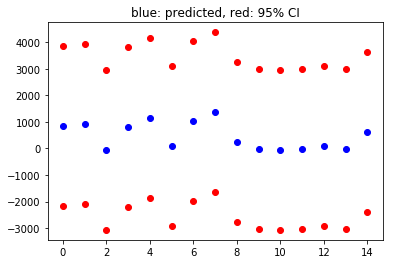

In [54]:
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

## Testing New Model

In [59]:
linear_formula = 'Property_crime ~ Burglary+Murder+Robbery+Larceny'

In [60]:
lm = smf.ols(formula=linear_formula, data=df).fit()

In [61]:
lm.params

Intercept    -2.732810
Burglary      1.512768
Murder      -32.094243
Robbery     -16.573983
Larceny       1.008602
dtype: float64

In [62]:
lm.pvalues

Intercept    3.182475e-01
Burglary     0.000000e+00
Murder       6.827308e-11
Robbery      1.190027e-05
Larceny      0.000000e+00
dtype: float64

In [63]:
lm.rsquared

0.9975811808725487

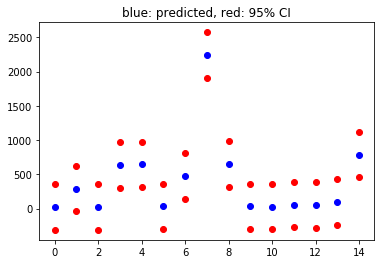

In [64]:
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

## Summary Based on Results

The old model worked well with the new data set given the r-squared value of 80%. The addition of new variable in the following model resulted a r-squared value of almost 100%. This value indicates there is extreme overfitting in the new model. The new variable were chosen due to their potential predictability for property crime. Burglary and Larceny produced pvalues of 0. These values may be correlated with the degree of freedom, which is clearly evident in the chart above.